# Redes Neurais Profundas Para Reconhecimento de Imagens

### Carregando o Dataset MNIST

In [1]:
!pip install watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensions-4.10.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:

In [2]:
# Importando o dataset com keras
import tensorflow
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("\nO Dataset MNIST tem %d exemplos de treinamento." % len(X_train))
print("\nO Dataset MNIST tem %d examplos de teste." % len(X_test))


O Dataset MNIST tem 60000 exemplos de treinamento.

O Dataset MNIST tem 10000 examplos de teste.


### Visualizando as 5 primeiras imagens de treino

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Version 0" --iversions

Author: Version 0

keras     : 2.13.1
tensorflow: 2.13.0



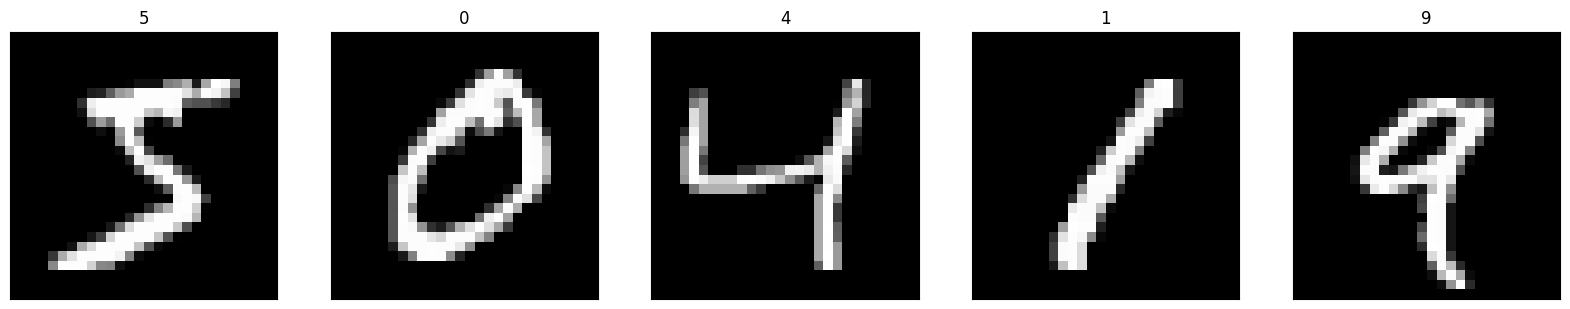

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# Plot
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### Visualizando uma imagem em detalhes

In [5]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

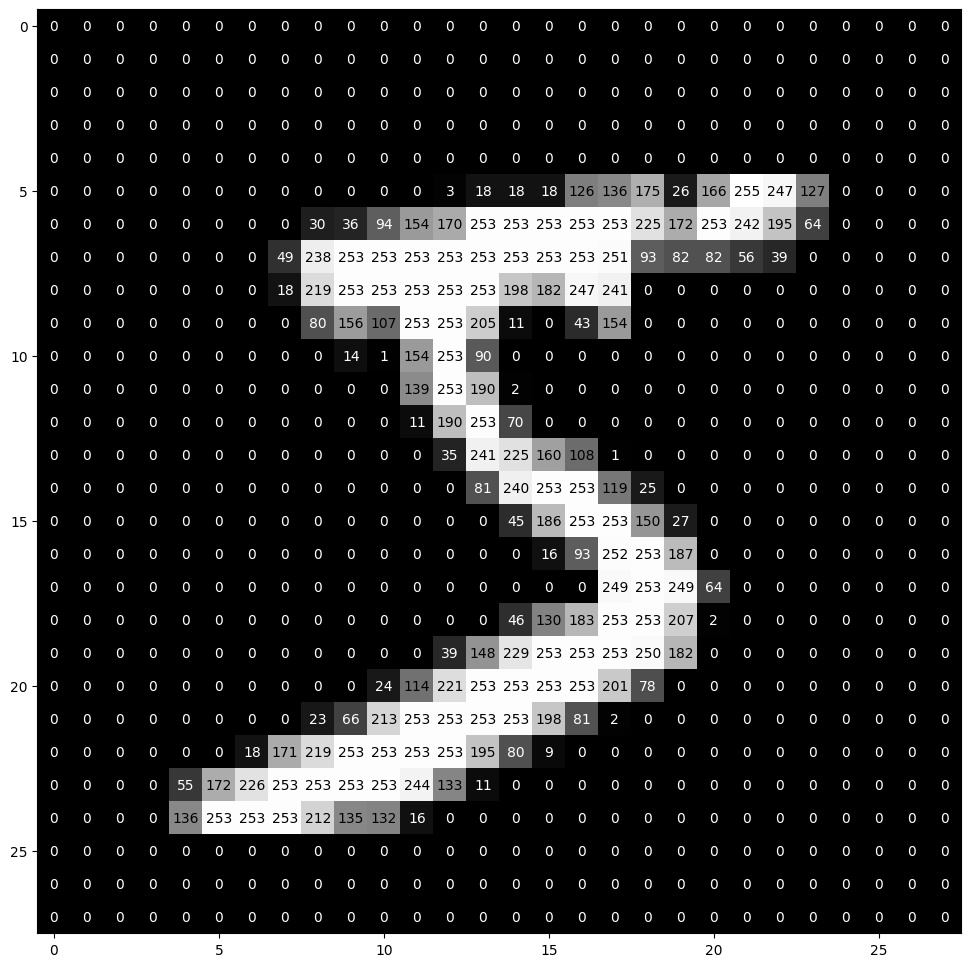

In [6]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### Ajustando a escala das imagens dividindo cada pixel por 255

In [7]:
# Escala [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### Encoding Labels Inteiros Categóricos usando One-Hot Scheme

In [10]:
from keras.utils import to_categorical

# Print
print('Labels com valores inteiros:')
print(y_train[:10])

# One-hot encode dos labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print
print('One-hot labels:')
print(y_train[:10])

Labels com valores inteiros:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Definindo a Arquitetura do Modelo

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Modelo
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Sumário
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 

### Compilando o Modelo

In [12]:
# Compila o Modelo
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',  metrics = ['accuracy'])

### Calculando a Acurácia de Classificação em Teste (antes do Treinamento)

In [13]:
# Acurácia em Teste
score = model.evaluate(X_test, y_test, verbose = 0)
accuracy = 100*score[1]

# Print
print('Acurácia em Teste: %.4f%%' % accuracy)

Acurácia em Teste: 10.5400%


### Treinando o Modelo

In [14]:
from keras.callbacks import ModelCheckpoint

# Checkpoint
checkpointer = ModelCheckpoint(filepath = 'mnist.model.best.hdf5', verbose = 1, save_best_only = True)

In [15]:
# Treinamento
hist = model.fit(X_train,
                 y_train,
                 batch_size = 128,
                 epochs = 10,
                 validation_split = 0.2,
                 callbacks = [checkpointer],
                 verbose = 1,
                 shuffle = True)

Epoch 1/10
372/375 [============================>.] - ETA: 0s - loss: 0.2878 - accuracy: 0.9123
Epoch 1: val_loss improved from inf to 0.13253, saving model to mnist.model.best.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.2869 - accuracy: 0.9126 - val_loss: 0.1325 - val_accuracy: 0.9601
Epoch 2/10
 11/375 [..............................] - ETA: 4s - loss: 0.1228 - accuracy: 0.9645

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


372/375 [============================>.] - ETA: 0s - loss: 0.1153 - accuracy: 0.9648
Epoch 2: val_loss improved from 0.13253 to 0.09593, saving model to mnist.model.best.hdf5
375/375 [==============================] - 4s 11ms/step - loss: 0.1153 - accuracy: 0.9648 - val_loss: 0.0959 - val_accuracy: 0.9709
Epoch 3/10
372/375 [============================>.] - ETA: 0s - loss: 0.0820 - accuracy: 0.9741
Epoch 3: val_loss improved from 0.09593 to 0.08371, saving model to mnist.model.best.hdf5
375/375 [==============================] - 5s 14ms/step - loss: 0.0819 - accuracy: 0.9741 - val_loss: 0.0837 - val_accuracy: 0.9734
Epoch 4/10
374/375 [============================>.] - ETA: 0s - loss: 0.0617 - accuracy: 0.9808
Epoch 4: val_loss improved from 0.08371 to 0.07595, saving model to mnist.model.best.hdf5
375/375 [==============================] - 4s 11ms/step - loss: 0.0618 - accuracy: 0.9808 - val_loss: 0.0760 - val_accuracy: 0.9776
Epoch 5/10
375/375 [==============================] - ETA

### Carregando o Modelo com Melhor Acurácia no Dataset de Validação

In [16]:
# Carregando os pesos com Melhor Acurácia
model.load_weights('mnist.model.best.hdf5')

### Calculando a Classificação em Teste

In [17]:
# Acurácia em Teste
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# Print
print('Acurácia em Teste: %.4f%%' % accuracy)

Acurácia em Teste: 97.7100%
